<a href="https://colab.research.google.com/github/schwarer2006/Projects/blob/master/Script_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install numpy


In [7]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from datetime import datetime

# Beispiel-Datensatz laden
data = pd.read_csv('/content/fake_data_with_errors.csv')

# Fehlerhafte Werte (Einkommen und Geburtsdatum) behandeln
# Einkommen auf numerisch setzen, Fehlerhafte Werte als NaN markieren
data['Einkommen'] = pd.to_numeric(data['Einkommen'], errors='coerce')

# Geburtsdatum auf Datum setzen, fehlerhafte Werte als NaN markieren
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')

# Fehlende Werte mit einem sinnvollen Standardwert behandeln
data['Einkommen'] = data['Einkommen'].fillna(data['Einkommen'].mean())
data['Geburtsdatum'] = data['Geburtsdatum'].fillna(pd.Timestamp(datetime.now()))

# Das Alter in Jahren berechnen
data['Alter'] = (datetime.now() - data['Geburtsdatum']).dt.days // 365

# Kategorische Daten wie 'Name' und 'PLZ' in numerische Werte umwandeln
le_name = LabelEncoder()
data['Name'] = le_name.fit_transform(data['Name'])

le_plz = LabelEncoder()
data['PLZ'] = le_plz.fit_transform(data['PLZ'])

# Merkmale auswählen, die für die Anomalie-Erkennung relevant sind
features = data[['Name', 'PLZ', 'Einkommen', 'Alter']]

# Daten in Trainings- und Testdatensatz aufteilen
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Isolation Forest-Modell erstellen
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Modell trainieren
model.fit(X_train)

# Anomalien im Testdatensatz vorhersagen
predictions = model.predict(X_test)

# Vorhersagen interpretieren: -1 bedeutet Anomalie, 1 bedeutet normaler Datenpunkt
X_test['anomaly'] = predictions

# Anomalien anzeigen
anomalies = X_test[X_test['anomaly'] == -1]
print(f"Anzahl der Anomalien: {len(anomalies)}")
print(anomalies)

# Fehlerhafte Daten (Anomalien) können hier überprüft und korrigiert werden


Anzahl der Anomalien: 1
    Name  PLZ  Einkommen  Alter  anomaly
83     1   20    28568.4      0       -1


In [ ]:
import pandas as pd

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_errors.csv'  # Den richtigen Pfad zur CSV-Datei angeben
data = pd.read_csv(file_path)

# Pandas-Einstellungen ändern, um alle Zeilen anzuzeigen
pd.set_option('display.max_rows', None)

# Den gesamten Datensatz anzeigen
print(data)

In [ ]:
import pandas as pd

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_errors.csv'  # Den richtigen Pfad zur CSV-Datei angeben
data = pd.read_csv(file_path)

# Fehlerhafte Werte finden
# 1. Fehlende Werte (NaN)
missing_values = data[data.isnull().any(axis=1)]

# 2. Ungültige Datumswerte erkennen und Fehler behandeln
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')
invalid_dates = data[data['Geburtsdatum'].isnull()]

# 3. Doppelte Zeilen erkennen
duplicate_rows = data[data.duplicated()]

# Fehlende Werte anzeigen
if not missing_values.empty:
    print("Zeilen mit fehlenden Werten (NaN):")
    print(missing_values)
else:
    print("Keine fehlenden Werte gefunden.")

# Ungültige Datumswerte anzeigen
if not invalid_dates.empty:
    print("\nZeilen mit ungültigen Datumswerten:")
    print(invalid_dates)
else:
    print("Keine ungültigen Datumswerte gefunden.")

# Doppelte Zeilen anzeigen
if not duplicate_rows.empty:
    print("\nDoppelte Zeilen:")
    print(duplicate_rows)
else:
    print("Keine doppelten Zeilen gefunden.")

# Die Anzahl der Zeilen pro "Seite" festlegen
rows_per_page = 10
start = 0

# Durch den Datensatz blättern
while start < len(data):
    # Ausgabe eines "Seiten"-Blocks
    print(data[start:start + rows_per_page])

    # Nutzer fragen, ob weitergeblättert werden soll
    next_page = input("\nWeiterblättern? (j/n): ")
    if next_page.lower() != 'j':
        break

    # Nächsten Block anzeigen
    start += rows_per_page


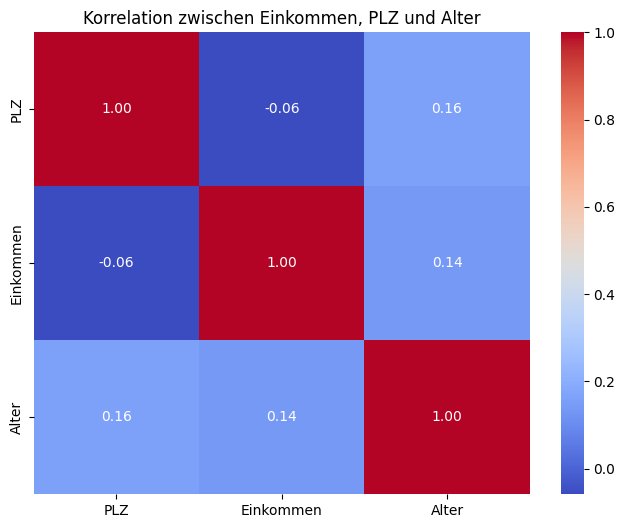

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_errors.csv'  # Den richtigen Pfad zur CSV-Datei angeben
data = pd.read_csv(file_path)

# Fehlerhafte Werte in der Geburtsdatum-Spalte behandeln
# Geburtsdatum auf Datum setzen, fehlerhafte Werte als NaN markieren
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')

# Alter berechnen (Differenz in Tagen durch 365, um das Alter in Jahren zu erhalten)
data['Alter'] = (pd.Timestamp.now() - data['Geburtsdatum']).dt.days // 365

# Nur numerische Spalten auswählen
data['PLZ'] = pd.to_numeric(data['PLZ'], errors='coerce')

# Nur relevante Spalten für die Korrelation auswählen
numeric_data = data[['PLZ', 'Einkommen', 'Alter']].dropna()

# Korrelationsmatrix erstellen
corr = numeric_data.corr()

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korrelation zwischen Einkommen, PLZ und Alter')
plt.show()


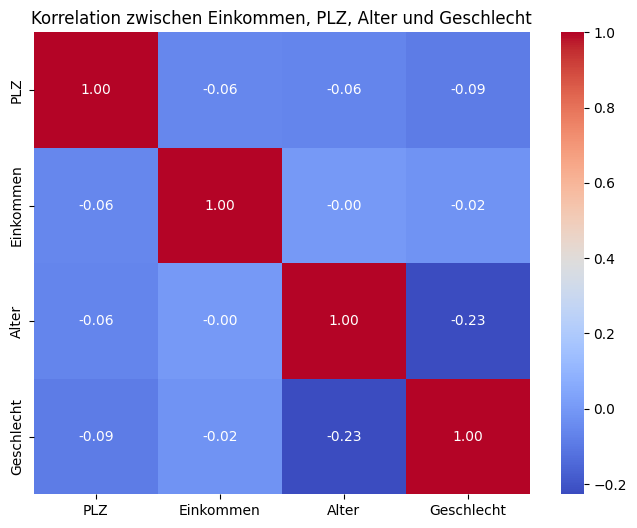


Erklärung zur Heatmap:
Die Heatmap zeigt die Korrelation zwischen den folgenden Variablen an:
- **Einkommen**: Das jährliche Einkommen der Personen.
- **PLZ**: Die Postleitzahl, die als numerischer Wert verwendet wird.
- **Alter**: Das Alter der Personen, das aus dem Geburtsdatum berechnet wurde.
- **Geschlecht**: Das Geschlecht, wobei 'männlich' als 1 und 'weiblich' als 0 kodiert ist.

Die Korrelation gibt an, wie stark die Variablen miteinander zusammenhängen:
- Eine Korrelation von **1.0** bedeutet einen perfekten positiven Zusammenhang.
- Eine Korrelation von **-1.0** bedeutet einen perfekten negativen Zusammenhang.
- Eine Korrelation von **0.0** bedeutet keinen Zusammenhang.

Beispiel:
- Eine hohe positive Korrelation zwischen Einkommen und Alter würde darauf hinweisen, dass ältere Personen tendenziell mehr verdienen.
- Eine negative Korrelation zwischen Geschlecht und Einkommen könnte darauf hinweisen, dass männliche Personen tendenziell mehr verdienen.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_gender.csv'  # Den richtigen Pfad zur CSV-Datei angeben
data = pd.read_csv(file_path)

# Fehlerhafte Werte in der Geburtsdatum-Spalte behandeln
# Geburtsdatum auf Datum setzen, fehlerhafte Werte als NaN markieren
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')

# Alter berechnen (Differenz in Tagen durch 365, um das Alter in Jahren zu erhalten)
data['Alter'] = (pd.Timestamp.now() - data['Geburtsdatum']).dt.days // 365

# Geschlecht in numerische Werte umwandeln (m = 1, f = 0)
le = LabelEncoder()
data['Geschlecht'] = le.fit_transform(data['Geschlecht'])  # 'm' wird zu 1, 'f' wird zu 0

# Nur numerische Spalten auswählen
data['PLZ'] = pd.to_numeric(data['PLZ'], errors='coerce')

# Nur relevante Spalten für die Korrelation auswählen
numeric_data = data[['PLZ', 'Einkommen', 'Alter', 'Geschlecht']].dropna()

# Korrelationsmatrix erstellen
corr = numeric_data.corr()

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korrelation zwischen Einkommen, PLZ, Alter und Geschlecht')
plt.show()

# Erklärung zur Heatmap
print("\nErklärung zur Heatmap:")
print("Die Heatmap zeigt die Korrelation zwischen den folgenden Variablen an:")
print("- **Einkommen**: Das jährliche Einkommen der Personen.")
print("- **PLZ**: Die Postleitzahl, die als numerischer Wert verwendet wird.")
print("- **Alter**: Das Alter der Personen, das aus dem Geburtsdatum berechnet wurde.")
print("- **Geschlecht**: Das Geschlecht, wobei 'männlich' als 1 und 'weiblich' als 0 kodiert ist.")
print("\nDie Korrelation gibt an, wie stark die Variablen miteinander zusammenhängen:")
print("- Eine Korrelation von **1.0** bedeutet einen perfekten positiven Zusammenhang.")
print("- Eine Korrelation von **-1.0** bedeutet einen perfekten negativen Zusammenhang.")
print("- Eine Korrelation von **0.0** bedeutet keinen Zusammenhang.")
print("\nBeispiel:")
print("- Eine hohe positive Korrelation zwischen Einkommen und Alter würde darauf hinweisen, dass ältere Personen tendenziell mehr verdienen.")
print("- Eine negative Korrelation zwischen Geschlecht und Einkommen könnte darauf hinweisen, dass männliche Personen tendenziell mehr verdienen.")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_gender_age.csv'  # Korrigierter Pfad zur CSV-Datei
data = pd.read_csv(file_path)

# Fehlerhafte Werte in der Geburtsdatum-Spalte behandeln
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')

# Alter berechnen (Differenz in Tagen durch 365, um das Alter in Jahren zu erhalten)
data['Alter'] = (pd.Timestamp.now() - data['Geburtsdatum']).dt.days // 365

# Geschlecht in numerische Werte umwandeln (m = 1, f = 0)
le = LabelEncoder()
data['Geschlecht'] = le.fit_transform(data['Geschlecht'])

# Nur numerische Spalten auswählen
data['PLZ'] = pd.to_numeric(data['PLZ'], errors='coerce')

# Nur relevante Spalten für die Korrelation auswählen
numeric_data = data[['PLZ', 'Einkommen', 'Alter', 'Geschlecht']].dropna()

# Max-, Min-, Mean- und Avg-Werte berechnen
max_values = numeric_data.max()
min_values = numeric_data.min()
mean_values = numeric_data.mean()
avg_values = numeric_data.mean()

# Auswertung der Verhältnisse zwischen den Variablen
male_income_avg = numeric_data[numeric_data['Geschlecht'] == 1]['Einkommen'].mean()
female_income_avg = numeric_data[numeric_data['Geschlecht'] == 0]['Einkommen'].mean()
income_ratio = male_income_avg / female_income_avg if female_income_avg > 0 else None

# Ausgabe der Werte
print("Max-Werte:\n", max_values)
print("\nMin-Werte:\n", min_values)
print("\nMean-Werte:\n", mean_values)
print("\nDurchschnitt (Avg)-Werte:\n", avg_values)

print("\nVerhältnis des Durchschnittseinkommens (männlich vs weiblich):")
if income_ratio:
    print(f"Das durchschnittliche Einkommen von Männern ist {income_ratio:.2f}-mal höher als das von Frauen.")
else:
    print("Kein gültiges Verhältnis verfügbar (keine Daten für Frauen).")

# Korrelationsmatrix erstellen
corr = numeric_data.corr()

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korrelation zwischen Einkommen, PLZ, Alter und Geschlecht')
plt.show()

# Erklärung zur Heatmap
print("\nErklärung zur Heatmap:")
print("Die Heatmap zeigt die Korrelation zwischen den folgenden Variablen an:")
print("- **Einkommen**: Das jährliche Einkommen der Personen.")
print("- **PLZ**: Die Postleitzahl, die als numerischer Wert verwendet wird.")
print("- **Alter**: Das Alter der Personen, das aus dem Geburtsdatum berechnet wurde.")
print("- **Geschlecht**: Das Geschlecht, wobei 'männlich' als 1 und 'weiblich' als 0 kodiert ist.")
print("\nDie Korrelation gibt an, wie stark die Variablen miteinander zusammenhängen:")
print("- Eine Korrelation von **1.0** bedeutet einen perfekten positiven Zusammenhang.")
print("- Eine Korrelation von **-1.0** bedeutet einen perfekten negativen Zusammenhang.")
print("- Eine Korrelation von **0.0** bedeutet keinen Zusammenhang.")
print("\nBeispiel:")
print("- Eine hohe positive Korrelation zwischen Einkommen und Alter würde darauf hinweisen, dass ältere Personen tendenziell mehr verdienen.")
print("- Eine negative Korrelation zwischen Geschlecht und Einkommen könnte darauf hinweisen, dass männliche Personen tendenziell mehr verdienen.")


Max-Werte:
 PLZ                    8565.00
Einkommen             99801.99
Alter                    56.00
Geschlecht                1.00
Hochschulabschluss        1.00
Herkunft                  2.00
dtype: float64

Min-Werte:
 PLZ                    1035.00
Einkommen             20093.95
Alter                     4.00
Geschlecht                0.00
Hochschulabschluss        0.00
Herkunft                  0.00
dtype: float64

Mean-Werte:
 PLZ                    7824.262500
Einkommen             60806.466937
Alter                    31.435696
Geschlecht                0.517500
Hochschulabschluss        0.500000
Herkunft                  1.052500
dtype: float64

Durchschnitt (Avg)-Werte:
 PLZ                    7824.262500
Einkommen             60806.466937
Alter                    31.435696
Geschlecht                0.517500
Hochschulabschluss        0.500000
Herkunft                  1.052500
dtype: float64


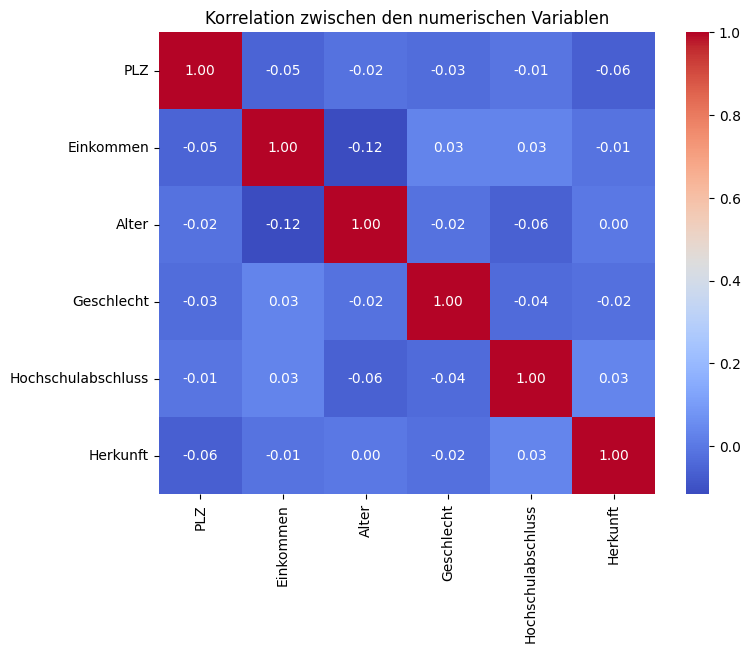

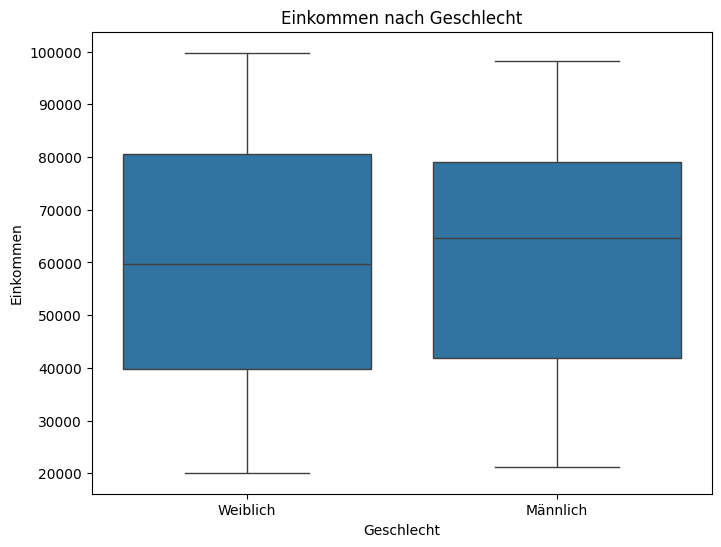

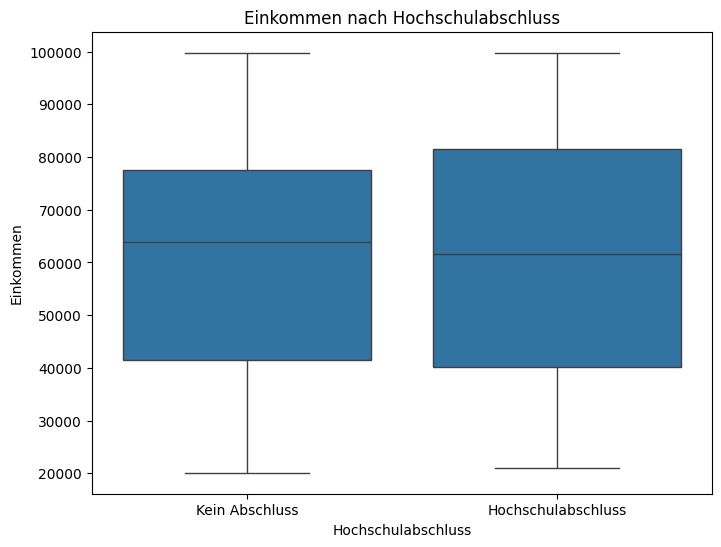

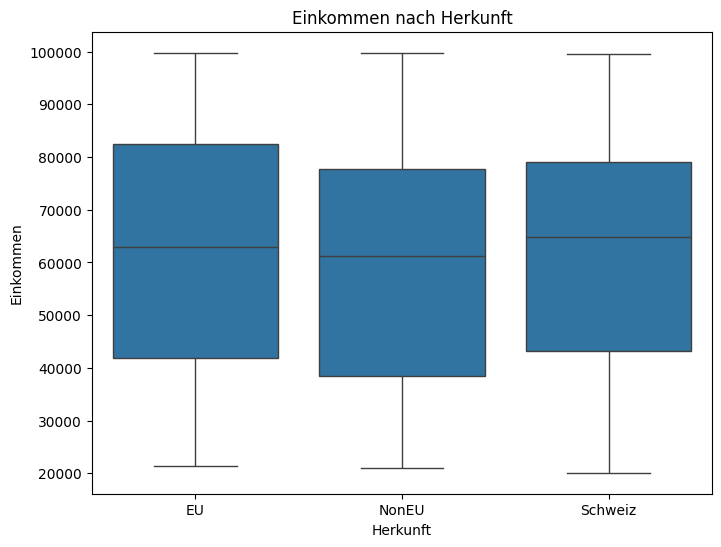

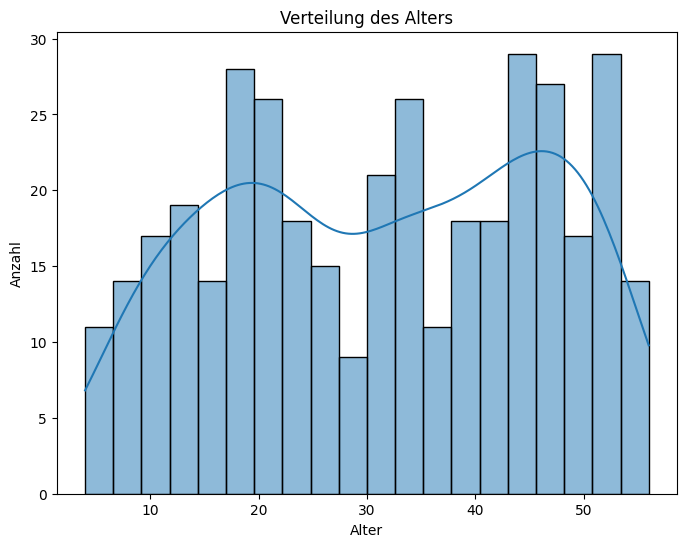

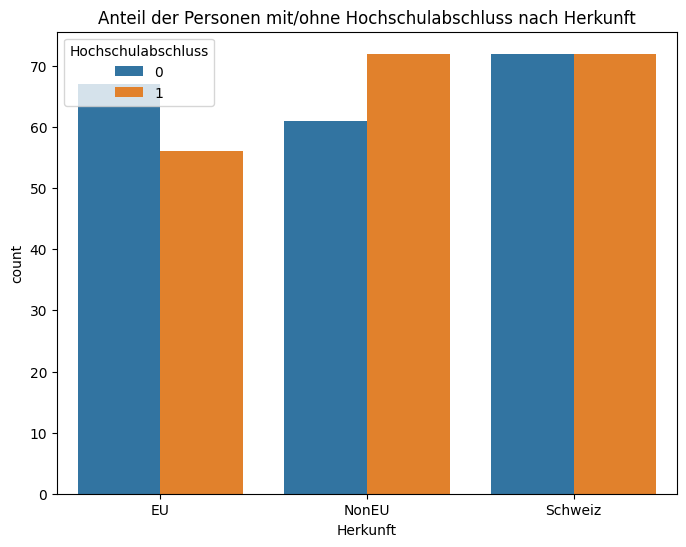


Erklärung zur Visualisierung:
- Die Heatmap zeigt die Korrelation zwischen den numerischen Variablen (z.B. Einkommen, PLZ, Alter, etc.).
- Der Boxplot zeigt das Einkommen nach Geschlecht, Hochschulabschluss und Herkunft, um Unterschiede zwischen den Gruppen zu verdeutlichen.
- Die Altersverteilung zeigt, wie sich die Altersstruktur im Datensatz verteilt.
- Der Anteil von Personen mit Hochschulabschluss nach Herkunft gibt Aufschluss über Bildungsunterschiede in den verschiedenen Regionen.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Beispiel-Datensatz laden
file_path = '/content/fake_data_with_full_details.csv'  # Korrigierter Pfad zur CSV-Datei
data = pd.read_csv(file_path)

# Fehlerhafte Werte in der Geburtsdatum-Spalte behandeln
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], errors='coerce')

# Alter berechnen (Differenz in Tagen durch 365, um das Alter in Jahren zu erhalten)
data['Alter'] = (pd.Timestamp.now() - data['Geburtsdatum']).dt.days // 365

# Geschlecht in numerische Werte umwandeln (m = 1, f = 0)
# Instead of pd.to_numeric, use LabelEncoder to handle non-numeric values if present
le = LabelEncoder()
data['Geschlecht'] = le.fit_transform(data['Geschlecht'].astype(str))

# Nur numerische Spalten auswählen
data['PLZ'] = pd.to_numeric(data['PLZ'], errors='coerce')
data['Einkommen'] = pd.to_numeric(data['Einkommen'], errors='coerce')
data['Hochschulabschluss'] = pd.to_numeric(data['Hochschulabschluss'], errors='coerce')
# Convert 'Herkunft' to string before applying LabelEncoder
data['Herkunft'] = le.fit_transform(data['Herkunft'].astype(str))

# Korrelation zwischen den numerischen Spalten
# Remove dropna() to keep all rows for the boxplots
numeric_data = data[['PLZ', 'Einkommen', 'Alter', 'Geschlecht', 'Hochschulabschluss', 'Herkunft']]

# ... (rest of your code remains the same)

# Max-, Min-, Mean- und Avg-Werte berechnen
max_values = numeric_data.max()
min_values = numeric_data.min()
mean_values = numeric_data.mean()
avg_values = numeric_data.mean()

# Ausgabe der Werte
print("Max-Werte:\n", max_values)
print("\nMin-Werte:\n", min_values)
print("\nMean-Werte:\n", mean_values)
print("\nDurchschnitt (Avg)-Werte:\n", avg_values)

# Korrelationsmatrix erstellen und Heatmap anzeigen
corr = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korrelation zwischen den numerischen Variablen')
plt.show()

# Boxplot: Einkommen nach Geschlecht
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geschlecht', y='Einkommen', data=data)
plt.title('Einkommen nach Geschlecht')
plt.xticks([0, 1], ['Weiblich', 'Männlich'])
plt.show()

# Boxplot: Einkommen nach Hochschulabschluss
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hochschulabschluss', y='Einkommen', data=data)
plt.title('Einkommen nach Hochschulabschluss')
plt.xticks([0, 1], ['Kein Abschluss', 'Hochschulabschluss'])
plt.show()

# Boxplot: Einkommen nach Herkunft
plt.figure(figsize=(8, 6))
sns.boxplot(x='Herkunft', y='Einkommen', data=data)
plt.title('Einkommen nach Herkunft')
plt.xticks([0, 1, 2], ['EU', 'NonEU', 'Schweiz'])
plt.show()

# Altersverteilung anzeigen
plt.figure(figsize=(8, 6))
sns.histplot(data['Alter'].dropna(), kde=True, bins=20)
plt.title('Verteilung des Alters')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()

# Anteil der Personen mit Hochschulabschluss nach Herkunft
plt.figure(figsize=(8, 6))
sns.countplot(x='Herkunft', hue='Hochschulabschluss', data=data)
plt.title('Anteil der Personen mit/ohne Hochschulabschluss nach Herkunft')
plt.xticks([0, 1, 2], ['EU', 'NonEU', 'Schweiz'])
plt.show()

# Erklärung zur Visualisierung
print("\nErklärung zur Visualisierung:")
print("- Die Heatmap zeigt die Korrelation zwischen den numerischen Variablen (z.B. Einkommen, PLZ, Alter, etc.).")
print("- Der Boxplot zeigt das Einkommen nach Geschlecht, Hochschulabschluss und Herkunft, um Unterschiede zwischen den Gruppen zu verdeutlichen.")
print("- Die Altersverteilung zeigt, wie sich die Altersstruktur im Datensatz verteilt.")
print("- Der Anteil von Personen mit Hochschulabschluss nach Herkunft gibt Aufschluss über Bildungsunterschiede in den verschiedenen Regionen.")
